# CHAPTER 1: SIMPLE LINEAR REGRESSION MODELING

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

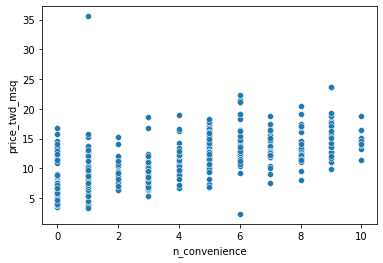

In [4]:
#  Visualizing two numeric variables
sns.scatterplot(x = 'n_convenience', y = 'price_twd_msq', data = taiwan_real_estate)
plt.show()

# Linear Regression with ols()

In [8]:
# Import the ols function
from statsmodels.formula.api import ols

In [9]:
# Create model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data = taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


# Visualizing numeric vs. categorical

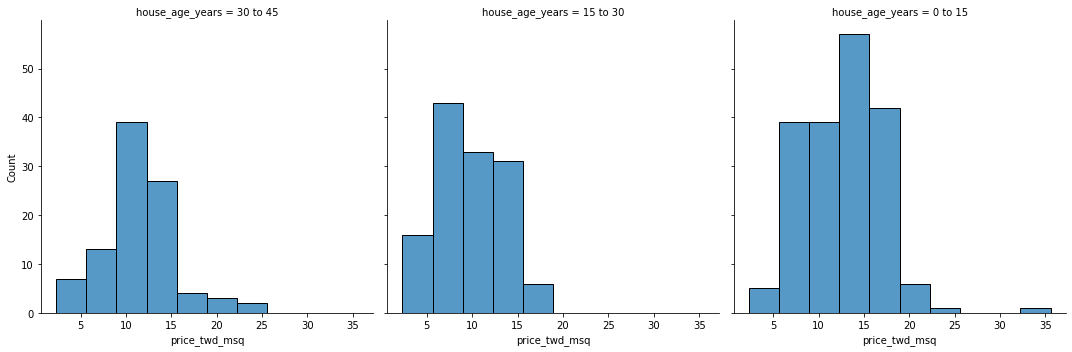

In [11]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data = taiwan_real_estate,
            x = 'price_twd_msq',
            col = 'house_age_years',
            col_wrap = 3,
            bins = 10)

plt.show()

In [12]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


# Linear regression with a categorical explanatory variable

In [13]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data = taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [16]:
# Update the model formula so that no intercept is included in the model.
mdl_price_vs_age0 = ols('price_twd_msq ~ house_age_years + 0', data = taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


# CHAPTER 2: PREDICTIONS AND MODEL OBJECTS

# Predicting house prices with 'n_convenience'

In [17]:
# Create the explanatory_data 'n_convenience'
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
explanatory_data

,n_convenience
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [27]:
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [17]:
# Create prediction_data by assigning 'price_twd_msq' Series to 'explanatory_data' DataFrame
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))
prediction_data

,n_convenience,price_twd_msq
0,0,8.224237
1,1,9.022317
2,2,9.820397
3,3,10.618477
4,4,11.416556
5,5,12.214636
6,6,13.012716
7,7,13.810795
8,8,14.608875
9,9,15.406955


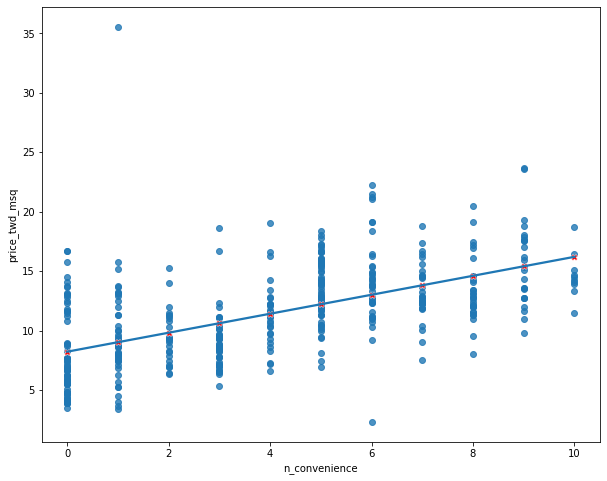

In [25]:
# Visualizing predictions
fig = plt.figure(figsize=(10,8))
sns.regplot(x = 'n_convenience',
           y = 'price_twd_msq',
           data = taiwan_real_estate,
           ci = None)

sns.scatterplot(x = 'n_convenience',
               y = 'price_twd_msq',
               data = prediction_data,
               ci = None,
               marker = 'X',
               color = 'Red')
plt.show()

# Extracting model elements

In [32]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [33]:
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [34]:
# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [35]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.41e-37
Time:                        10:00:18   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

# Regression to the mean

In [38]:
# Import sp500 dataset
sp500_yearly_returns = pd.read_csv('sp500_yearly_returns.csv')

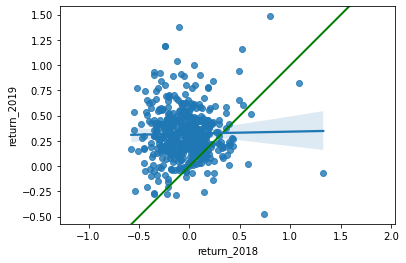

In [39]:
# Plotting consecutive portfolio returns
fig = plt.figure()

plt.axline(xy1 = (0,0), slope = 1, linewidth = 2, color = 'green')
sns.regplot(x = 'return_2018', y = 'return_2019', data = sp500_yearly_returns)
plt.axis("equal")
plt.show()

In [41]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols('return_2019 ~ return_2018', data = sp500_yearly_returns).fit()
mdl_returns.params

Intercept      0.321321
return_2018    0.020069
dtype: float64

In [42]:
# Create a DataFrame with return_2018 at -1, 0, and 1
explanatory_data = pd.DataFrame({'return_2018': [-1, 0, 1]})\

# Use mdl_returns to predict with exploratory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


# Transforming the explanatory variable

### If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. 

<AxesSubplot:xlabel='dist_to_mrt_m', ylabel='price_twd_msq'>

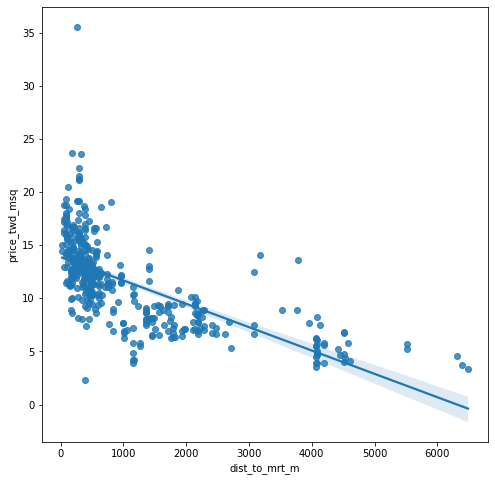

In [45]:
fig = plt.figure(figsize = (8,8))
sns.regplot(x = 'dist_to_mrt_m', y = 'price_twd_msq', data = taiwan_real_estate)

<function matplotlib.pyplot.show(close=None, block=None)>

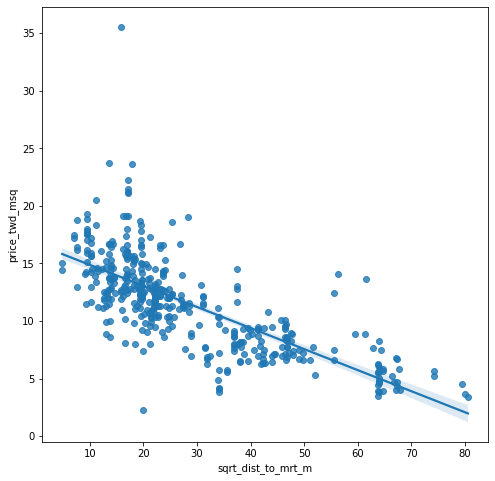

In [49]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate['sqrt_dist_to_mrt_m'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

# Plot using the transformed variable
fig = plt.figure(figsize = (8,8))
sns.regplot(x = 'sqrt_dist_to_mrt_m', y = 'price_twd_msq', data = taiwan_real_estate)
plt.show

In [50]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data = taiwan_real_estate).fit()
mdl_price_vs_dist.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [54]:
# Create prediction_data by adding a column of predictions called price_twd_msq to explanatory_data 
# Predict using mdl_price_vs_dist and explanatory_data.

# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


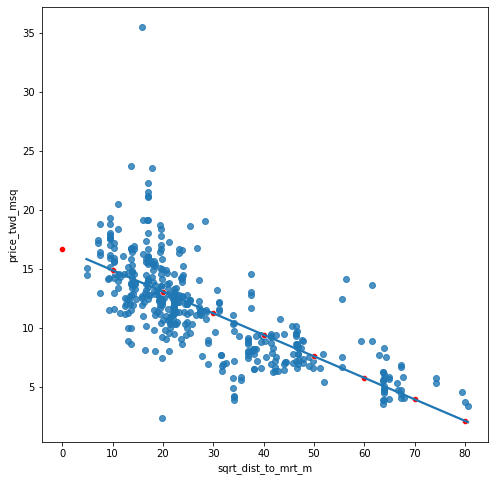

In [57]:
# Plot the figure
fig = plt.figure(figsize = (8,8))
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data = prediction_data, color="red")
plt.show()